Steigung [V/Hz] = 0.6357796560256483 , Standardfehler = 0.013607457052426549
Nullspannung [V] = -0.09742579478819292 , Standardfehler = 0.1340837992595958


Chi-Quadrat = 1.1740097348326421
Freiheitsgrade = 3
Chi-Quadrat reduziert = 0.39133657827754736
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 76 %


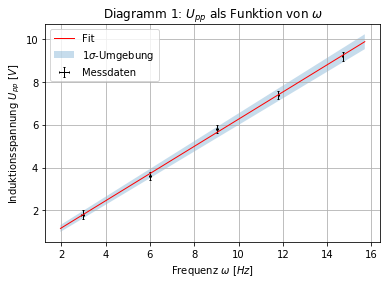

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 1: U_m über f
f = np.array([2.96,6.02,9.01,11.8,14.7])
fehler_f = np.array([0.05,0.05,0.05,0.01,0.01])

U_m = np.array([0.9,1.8,2.9,3.7,4.6])
fehler_U_m = np.array([0.1,0.1,0.1,0.1,0.1])

U_pp = 2*U_m
fehler_U_pp = 2*fehler_U_m

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (a, b) = p
    return a*x+b

model = odr.Model(fit_func)

#darzustellende Daten
x = f
y = U_pp
delta_x = fehler_f
delta_y = fehler_U_pp

#Startparameter
para0 = [1.0, 1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0)
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd * perr
popt_bot = popt - nstd * perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-1, max(x)+1, 100)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 1: '+r'${U_{pp}}$'+' als Funktion von '+r'$\omega$')
plt.grid(True)
plt.xlabel('Frequenz '+r'$\omega$'+' '+r'${[Hz]}$')
plt.ylabel('Induktionsspannung '+r'${U_{pp}}$'+' '+r'${[V]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Grenzfrequenz berechnen
f_g = 1/np.tan(45*np.pi/180)

#Output
plt.savefig('figures/245_Diagramm1.pdf', format='pdf')

print('Steigung [V/Hz] =', popt[0], ', Standardfehler =', perr[0])
print('Nullspannung [V] =', popt[1], ', Standardfehler =', perr[1])
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')

Steigung [V/A] = 1.3780803393226733 , Standardfehler = 0.03431204247559972
Nullspannung [V] = 0.1802311865872918 , Standardfehler = 0.06287338789282541


Chi-Quadrat = 6.6094148490961215
Freiheitsgrade = 7
Chi-Quadrat reduziert = 0.9442021212994459
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 47 %


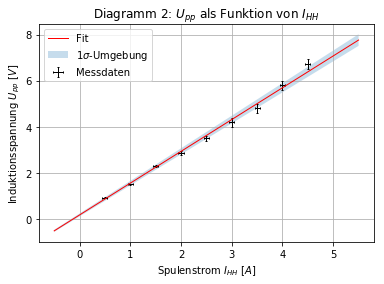

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 2: U_m über I_HH
I_HH = np.array([0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50])
fehler_I_HH = np.array([ 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05])

U_m = np.array([0.46,0.76,1.15,1.44,1.75,2.1,2.4,2.9,3.36])
fehler_U_m = np.array([0.01,0.01,0.02,0.04,0.05,0.1,0.1,0.1,0.1])

U_pp = 2*U_m
fehler_U_pp = 2*fehler_U_m

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (a, b) = p
    return a*x+b

model = odr.Model(fit_func)

#darzustellende Daten
x = I_HH
y = U_pp
delta_x = fehler_I_HH
delta_y = fehler_U_pp

#Startparameter
para0 = [1.0, 1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0)
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-1, max(x)+1, 100)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 2: '+r'${U_{pp}}$'+' als Funktion von '+r'${I_{HH}}$')
plt.grid(True)
plt.xlabel('Spulenstrom '+r'${I_{HH}}$'+' '+r'${[A]}$')
plt.ylabel('Induktionsspannung '+r'${U_{pp}}$'+' '+r'${[V]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Output
plt.savefig('figures/245_Diagramm2.pdf', format='pdf')

print('Steigung [V/A] =', popt[0], ', Standardfehler =', perr[0])
print('Nullspannung [V] =', popt[1], ', Standardfehler =', perr[1])
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')

Amplitude [V] = 4.768431216467123 , Standardfehler = 0.021186837768468563
Ausgangswinkel [°] = -0.981911428502888 , Standardfehler = 0.6588325317219716
Untergrundspannung [V] = -0.1231631314674312 , Standardfehler = 0.01975967706206923


Chi-Quadrat = 3.892776040875202
Freiheitsgrade = 9
Chi-Quadrat reduziert = 0.43253067120835575
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 92 %


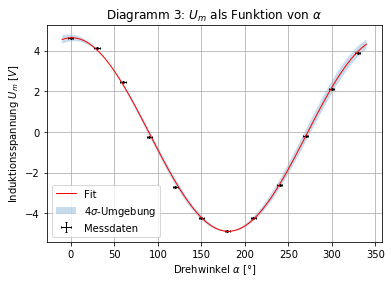

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 3: U_m über alpha
alpha = np.array([0,30,60,90,120,150,180,210,240,270,300,330])
fehler_alpha = np.array([3,3,3,3,3,3,3,3,3,3,3,3])

U_m = np.array([4.64,4.16,2.48,-0.23,-2.70,-4.24,-4.88,-4.24,-2.60,-0.20,2.12,3.88])
fehler_U_m = np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (a, b, c) = p
    return a*np.cos((x+b)*np.pi/180)+c

model = odr.Model(fit_func)

#darzustellende Daten
x = alpha
y = U_m
delta_x = fehler_alpha
delta_y = fehler_U_m

#Startparameter
para0 = [1.0, 1.0, 1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0)
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 4 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-10, max(x)+10, 100)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 3: '+r'${U_m}$'+' als Funktion von '+r'$\alpha$')
plt.grid(True)
plt.xlabel('Drehwinkel '+r'$\alpha$'+' '+r'${[°]}$')
plt.ylabel('Induktionsspannung '+r'${U_m}$'+' '+r'${[V]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Output
plt.savefig('figures/245_Diagramm3.pdf', format='pdf')

print('Amplitude [V] =', popt[0], ', Standardfehler =', perr[0])
print('Ausgangswinkel [°] =', popt[1], ', Standardfehler =', perr[1])
print('Untergrundspannung [V] =', popt[2], ', Standardfehler =', perr[2])
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')

R_2/R_HH = 0.816544318979079 , Standardfehler = 0.001089061039241941
L_2/R_HH [s]= 6.798774186287494e-05 , Standardfehler = 8.294132659518005e-06
L_HH/R_HH [s]= 13.065292675598439 , Standardfehler = 0.25914661572085657


Chi-Quadrat = 42.098540176005535
Freiheitsgrade = 16
Chi-Quadrat reduziert = 2.631158761000346
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 0 %


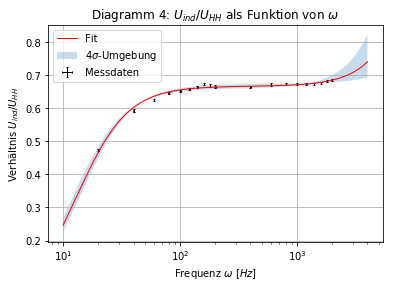

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 4: U_HH und U_ind über f
f = np.array([20.0,40.0,60.0,80,100,120,140,160,180,200,400,600,800,1000,1200,1400,1600,1800,2000])
fehler_f = np.array([0.1,0.1,0.4,0.4,1,1,1,1,1,1,1,2,2,5,5,5,5,5,5])

U_ind = np.array([3.32,4.20,4.42,4.54,4.58,4.60,4.62,4.64,4.64,4.62,4.62,4.62,4.62,4.62,4.62,4.62,4.66,4.68,4.70])
fehler_U_ind = np.array([0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02])

U_HH = np.array([7.00,7.08,7.08,7.02,7.02,6.98,6.96,6.90,6.94,6.94,6.96,6.88,6.86,6.86,6.86,6.86,6.88,6.86,6.86])
fehler_U_HH = np.array([0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02])

r = U_ind/U_HH
fehler_r = np.sqrt((fehler_U_HH/U_HH)**2+(fehler_U_ind/U_ind)**2)*r

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (a, b, c) = p
    return (a**2+(b*x)**2)/(1+(c/x)**2)

model = odr.Model(fit_func)

#darzustellende Daten
x = f
y = r
delta_x = fehler_f
delta_y = fehler_r

#Startparameter
para0 = [1.0, 1.0, 1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0)
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 4 #um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)/2, max(x)*2, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 4: '+r'${U_{ind}}/{U_{HH}}$'+' als Funktion von '+r'$\omega$')
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequenz '+r'$\omega$'+' '+r'${[Hz]}$')
plt.ylabel('Verhältnis '+r'${U_{ind}}/{U_{HH}}$'+' '+r'${}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Output
plt.savefig('figures/245_Diagramm4.pdf', format='pdf')

print('R_2/R_HH =', abs(popt[0]), ', Standardfehler =', perr[0])
print('L_2/R_HH [s]=', abs(popt[1]), ', Standardfehler =', perr[1])
print('L_HH/R_HH [s]=', abs(popt[2]), ', Standardfehler =', perr[2])
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')

R_HH [Ohm] = 3.450843262424256 , Standardfehler = 0.09159826254925012
L_HH [H] = 0.16943103437278054 , Standardfehler = 0.0014413790735907388


Chi-Quadrat = 185.91059927794097
Freiheitsgrade = 17
Chi-Quadrat reduziert = 10.935917604584763
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 0 %


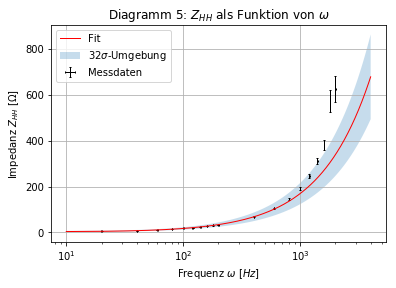

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 4: U_HH über I_HH
f = np.array([20.0,40.0,60.0,80,100,120,140,160,180,200,400,600,800,1000,1200,1400,1600,1800,2000])
fehler_f = np.array([0.1,0.1,0.4,0.4,1,1,1,1,1,1,1,2,2,5,5,5,5,5,5])

U_HH = np.array([700,708,708,702,702,698,696,690,694,694,696,688,686,686,686,686,688,686,686])*1e-2
fehler_U_HH = np.zeros(U_HH.size)+2e-2

I_HH = np.array([1451,925,656,503,408,342,295,257,229,207,101,66,47,36,28,22,18,12,11])*1e-3
fehler_I_HH = np.zeros(I_HH.size)+1e-3

Z_HH = U_HH/I_HH
fehler_Z_HH = np.sqrt((fehler_U_HH/U_HH)**2+(fehler_I_HH/I_HH)**2)*Z_HH

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (a, b) = p
    return np.sqrt(a**2+(b*x)**2)

model = odr.Model(fit_func)

#darzustellende Daten
x = f
y = Z_HH
delta_x = fehler_f
delta_y = fehler_Z_HH

#Startparameter
para0 = [1.0, 1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0)
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 32 #um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)/2, max(x)*2, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw= 1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 5: '+r'${Z_{HH}}$'+' als Funktion von '+r'$\omega$')
plt.grid(True)
plt.xscale('log')
plt.xlabel('Frequenz '+r'$\omega$'+' '+r'${[Hz]}$')
plt.ylabel('Impedanz '+r'${Z_{HH}}$'+' '+r'${[\Omega]}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Output
plt.savefig('figures/245_Diagramm5.pdf', format='pdf')

print('R_HH [Ohm] =', abs(popt[0]), ', Standardfehler =', perr[0])
print('L_HH [H] =', abs(popt[1]), ', Standardfehler =', perr[1])
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = {value:.0f}'.format(value=prob), '%')